In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saurabhmahadevpalve","key":"d8edaa6801661ee546bca299e877cd0e"}'}

In [ ]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
# Copy the kaggle .json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json to act(read and write)
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

100% 307M/307M [00:15<00:00, 24.3MB/s]
100% 307M/307M [00:15<00:00, 21.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/horses-or-humans-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/horse-or-human/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/horse-or-human/validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
33/33 [==============================] - 20s 162ms/step - loss: 1.8630 - accuracy: 0.8900 - val_loss: 9.5355 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 8s 207ms/step - loss: 0.3739 - accuracy: 0.9669 - val_loss: 36.8866 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 6s 157ms/step - loss: 0.0694 - accuracy: 0.9922 - val_loss: 45.8369 - val_accuracy: 0.5000
Epoch 4/10
33/33 [==============================] - 7s 173ms/step - loss: 0.1098 - accuracy: 0.9903 - val_loss: 33.1074 - val_accuracy: 0.5000
Epoch 5/10
33/33 [==============================] - 8s 202ms/step - loss: 0.0668 - accuracy: 0.9922 - val_loss: 56.3426 - val_accuracy: 0.5000
Epoch 6/10
33/33 [==============================] - 7s 177ms/step - loss: 0.1677 - accuracy: 0.9805 - val_loss: 5.6891 - val_accuracy: 0.6484
Epoch 7/10
33/33 [==============================] - 7s 179ms/step - loss: 0.3189 - accuracy: 0.9776 - val_loss: 2.2067 - val_accuracy: 0.8633
E

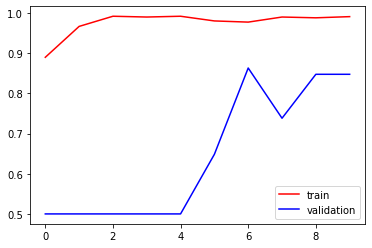

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

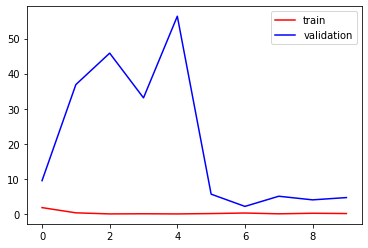

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/horse-or-human/train/horses/horse49-4.png')

In [ ]:
test_img

array([[[110, 107, 102],
        [ 94,  90,  83],
        [ 67,  66,  62],
        ...,
        [ 38,  45,  47],
        [ 48,  53,  54],
        [ 52,  59,  56]],

       [[ 79,  78,  77],
        [ 90,  88,  84],
        [ 80,  74,  66],
        ...,
        [ 37,  43,  45],
        [ 48,  53,  53],
        [ 54,  60,  58]],

       [[ 60,  63,  63],
        [ 69,  66,  63],
        [ 78,  68,  60],
        ...,
        [ 34,  40,  43],
        [ 46,  51,  50],
        [ 51,  56,  54]],

       ...,

       [[ 57,  80,  71],
        [ 59,  85,  77],
        [ 66,  94,  85],
        ...,
        [ 23,  20,  18],
        [ 23,  20,  18],
        [ 22,  19,  18]],

       [[ 63,  87,  77],
        [ 64,  90,  81],
        [ 64,  89,  82],
        ...,
        [ 24,  21,  19],
        [ 23,  21,  19],
        [ 23,  20,  19]],

       [[ 85, 105, 106],
        [ 89, 110, 110],
        [ 88, 108, 110],
        ...,
        [ 22,  19,  18],
        [ 21,  19,  17],
        [ 21,  19,  17]]

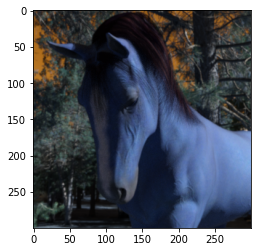

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(300, 300, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

Ans : When we insert the horse image then model will predict as 1 and human image then model will predict as 0.